# Run the whole deltas algorithm

In [46]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample
from deltas.classifiers.large_margin_train import LargeMarginClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

MNIST: 60000
Number of attribues: 784
Classes total: 54077 - 5923

Classes train: 32446 - 3553
Classes test:  21631 - 2370


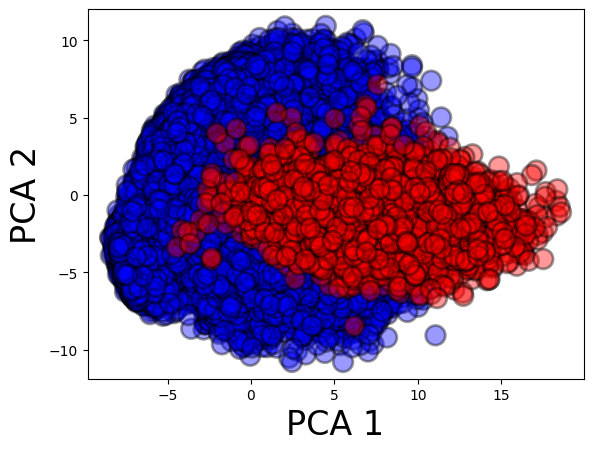

In [47]:
model = 'SVM-rbf'

data_clf = data.get_real_dataset('MNIST', scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

In [52]:
clf = LargeMarginClassifier().fit(data_clf['data']['X'], data_clf['data']['y'])

Train Epoch: 0: -0.012239456176757812
Train Epoch: 0: -10000.0
Train Epoch: 1: -10000.0
Train Epoch: 1: -10000.0
Train Epoch: 2: -10000.0
Train Epoch: 2: -10000.0
Train Epoch: 3: -10000.0
Train Epoch: 3: -10000.0
Train Epoch: 4: -10000.0
Train Epoch: 4: -10000.0


In [44]:
preds = clf.predict(data_clf['data_test']['X'])
print(sum(preds))

tensor([1.0000e+00, 4.2639e-28], device='cuda:0')
tensor([1.0000e+00, 1.7724e-32], device='cuda:0')
tensor([1.0000e+00, 2.3441e-36], device='cuda:0')
tensor([1.0000e+00, 9.3740e-32], device='cuda:0')
tensor([1.0000e+00, 4.3374e-34], device='cuda:0')
tensor([1.0000e+00, 2.8554e-30], device='cuda:0')
tensor([1.0000e+00, 6.1560e-36], device='cuda:0')
tensor([1.0000e+00, 3.5742e-29], device='cuda:0')
tensor([1.0000e+00, 3.6813e-29], device='cuda:0')
tensor([1.0000e+00, 3.1464e-31], device='cuda:0')
tensor([1.0000e+00, 4.3508e-30], device='cuda:0')
tensor([1.0000e+00, 8.8782e-35], device='cuda:0')
tensor([1.0000e+00, 3.4340e-30], device='cuda:0')
tensor([1.0000e+00, 1.5001e-31], device='cuda:0')
tensor([1.0000e+00, 3.1923e-31], device='cuda:0')
tensor([1.0000e+00, 9.9522e-29], device='cuda:0')
tensor([1.0000e+00, 1.9674e-32], device='cuda:0')
tensor([1.0000e+00, 1.4855e-29], device='cuda:0')
tensor([1.0000e+00, 1.6991e-34], device='cuda:0')
tensor([1.0000e+00, 3.7358e-36], device='cuda:0')


## Get Classifier

In [ ]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

In [ ]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

In [ ]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [ ]:
deltas_model.print_params()

# Evaluation on test data

In [ ]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])